## NN Adv Assignment

# baseline 만들어보기

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F

### TensorFlow

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings(action='ignore')

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdm

### Load Data

In [23]:
train = pd.read_csv('/content/drive/MyDrive/Tobigs/Week6/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Tobigs/Week6/Test.csv')

In [5]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [6]:
train['label'].nunique()

10

In [7]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,67,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,2,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,93,58,78,45,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,71,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,63,0,0,0,0,0,0,0


In [8]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

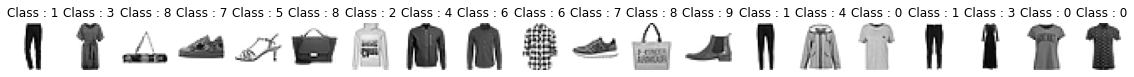

In [9]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X[idx].reshape(28, 28), cmap='gray_r')
  plt.title(f'Class : {y[idx]}')

In [10]:
X_test = test.values

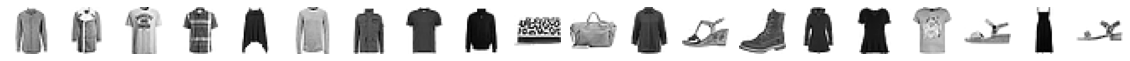

In [11]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X_test[idx].reshape(28, 28), cmap='gray_r')

### Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
train_x, train_valid_x, train_y, train_valid_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
train_x_torch = torch.from_numpy(train_x).type(torch.FloatTensor)
valid_x_torch = torch.from_numpy(train_valid_x).type(torch.FloatTensor)
train_y_torch = torch.from_numpy(train_y).type(torch.LongTensor)
valid_y_torch = torch.from_numpy(train_valid_y).type(torch.LongTensor)

In [16]:
train_x_torch = train_x_torch.view(-1, 1,28,28).float()
valid_x_torch = valid_x_torch.view(-1, 1,28,28).float()

In [17]:
train_set = torch.utils.data.TensorDataset(train_x_torch, train_y_torch)
valid_set = torch.utils.data.TensorDataset(valid_x_torch, valid_y_torch)

In [18]:
#preparing Data Loaders
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_set, shuffle = True, batch_size = 128)
valid_loader = torch.utils.data.DataLoader(valid_set, shuffle = True, batch_size = 128)

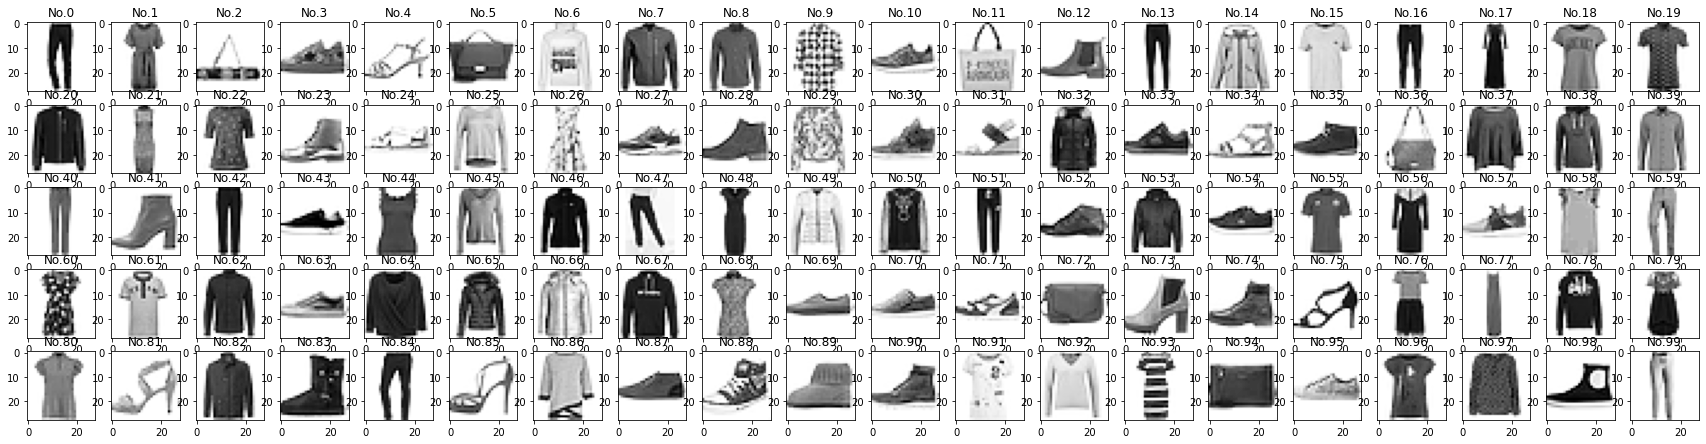

In [24]:
plt.figure(figsize=(30,30))
for i in range(100):
    plt.subplot(20, 20, i+1)
    plt.title("No." + str(i))
    plt.imshow(train.iloc[:,1:].iloc[i].values.reshape(28,28),cmap='Greys')


In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "gpu") 
device

device(type='cuda', index=0)

In [26]:
list_process=[]

In [27]:
def train(model, epoch):
    model.train()
    train_loss = 0
    correct = 0
    for data, label in train_loader:
        data, label = data.to(device), label.to(device)  
        optimizer.zero_grad()  
        output = model(data) 
        loss = criterion(output, label)  
        loss.backward() 
        optimizer.step()  
        train_loss += loss.item() 
        #get argmax values in outputs
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(label.view_as(pred)).sum().item()
    print('epoch for train: {}, accuracy: ({:.2f}%)'.format(epoch,correct*100 / len(train_loader.dataset)))
    list_process.append(correct*100 / len(train_loader.dataset))

In [28]:
def valid(model, epoch):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, label in valid_loader:
            data, label = data.to(device), label.to(device)
            output = model(data)
            test_loss += criterion(output, label).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(label.view_as(pred)).sum().item()
    print('epoch for test: {}, accuracy: ({:.2f}%)'.format(epoch,correct*100 / len(valid_loader.dataset)))

In [30]:
class cnn_layers(nn.Module):
    def __init__(self):
        super(cnn_layers,self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

model = cnn_layers()
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss() 

In [31]:
print(model)
for epoch in tqdm(range(20)):
    train(model,epoch)

cnn_layers(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


  0%|          | 0/20 [00:00<?, ?it/s]

epoch for train: 0, accuracy: (72.16%)
epoch for train: 1, accuracy: (80.38%)
epoch for train: 2, accuracy: (82.67%)
epoch for train: 3, accuracy: (83.76%)
epoch for train: 4, accuracy: (84.68%)
epoch for train: 5, accuracy: (85.36%)
epoch for train: 6, accuracy: (85.95%)
epoch for train: 7, accuracy: (86.50%)
epoch for train: 8, accuracy: (86.45%)
epoch for train: 9, accuracy: (87.04%)
epoch for train: 10, accuracy: (87.16%)
epoch for train: 11, accuracy: (87.55%)
epoch for train: 12, accuracy: (87.80%)
epoch for train: 13, accuracy: (88.03%)
epoch for train: 14, accuracy: (88.20%)
epoch for train: 15, accuracy: (88.34%)
epoch for train: 16, accuracy: (88.56%)
epoch for train: 17, accuracy: (88.81%)
epoch for train: 18, accuracy: (88.87%)
epoch for train: 19, accuracy: (89.12%)


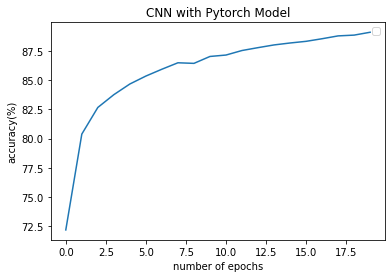

In [32]:
import matplotlib.pyplot as plt
plt.plot(list_process)
plt.xlabel("number of epochs")
plt.ylabel("accuracy(%)")
plt.title("CNN with Pytorch Model")
plt.legend()
plt.show()

In [33]:
for epoch in tqdm(range(10)):
    valid(model,epoch) #엥?????

  0%|          | 0/10 [00:00<?, ?it/s]

epoch for test: 0, accuracy: (88.66%)
epoch for test: 1, accuracy: (88.66%)
epoch for test: 2, accuracy: (88.66%)
epoch for test: 3, accuracy: (88.66%)
epoch for test: 4, accuracy: (88.66%)
epoch for test: 5, accuracy: (88.66%)
epoch for test: 6, accuracy: (88.66%)
epoch for test: 7, accuracy: (88.66%)
epoch for test: 8, accuracy: (88.66%)
epoch for test: 9, accuracy: (88.66%)


# advanced model 만들어 보기

In [35]:
class advanced_cnn_layers(nn.Module):
    def __init__(self):
        super(advanced_cnn_layers,self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)
        self.batchNorm1=nn.BatchNorm1d(128)
        self.batchNorm2=nn.BatchNorm1d(10)

    def _init_weight_(self): #He 초기화
      for m in self.fc1:
        if isinstance(m,nn.Linear):
          nn.init.kaiming_uniform_(m.weight)
      for m in self.fc2:
        if isinstance(m,nn.Linear):
          nn.init.kaiming_uniform_(m.weight)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x) #dropout 추가
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.batchNorm1(x) #batch normalization 추가
        x = F.relu(x)
        x = self.dropout2(x) #dropout 추가
        x = self.fc2(x)
        x = self.batchNorm2(x) #batch normalization 추가
        x = F.relu(x)
        output = F.log_softmax(x, dim=1)
        return output

model = advanced_cnn_layers()
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001) #SGD Adam으로 변경
criterion = nn.CrossEntropyLoss() 

In [36]:
print(model)
for epoch in tqdm(range(20)):
    train(model,epoch) 

advanced_cnn_layers(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (batchNorm1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchNorm2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


  0%|          | 0/20 [00:00<?, ?it/s]

epoch for train: 0, accuracy: (80.01%)
epoch for train: 1, accuracy: (86.99%)
epoch for train: 2, accuracy: (88.88%)
epoch for train: 3, accuracy: (89.90%)
epoch for train: 4, accuracy: (90.83%)
epoch for train: 5, accuracy: (91.38%)
epoch for train: 6, accuracy: (91.89%)
epoch for train: 7, accuracy: (92.40%)
epoch for train: 8, accuracy: (92.89%)
epoch for train: 9, accuracy: (93.15%)
epoch for train: 10, accuracy: (93.68%)
epoch for train: 11, accuracy: (93.94%)
epoch for train: 12, accuracy: (94.25%)
epoch for train: 13, accuracy: (94.58%)
epoch for train: 14, accuracy: (94.91%)
epoch for train: 15, accuracy: (95.08%)
epoch for train: 16, accuracy: (95.26%)
epoch for train: 17, accuracy: (95.49%)
epoch for train: 18, accuracy: (95.53%)
epoch for train: 19, accuracy: (95.68%)


모델 정확도 89.12% -> 95.68%로 증가

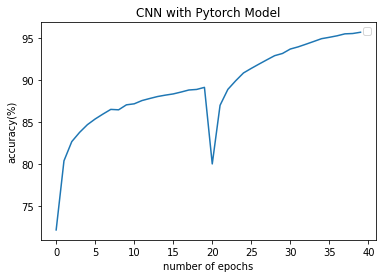

In [37]:
import matplotlib.pyplot as plt
plt.plot(list_process)
plt.xlabel("number of epochs")
plt.ylabel("accuracy(%)")
plt.title("CNN with Pytorch Model")
plt.legend()
plt.show() #왜 중간에 뚝 떨어지는디....왜...

In [38]:
for epoch in tqdm(range(10)):
    valid(model,epoch)

  0%|          | 0/10 [00:00<?, ?it/s]

epoch for test: 0, accuracy: (92.75%)
epoch for test: 1, accuracy: (92.75%)
epoch for test: 2, accuracy: (92.75%)
epoch for test: 3, accuracy: (92.75%)
epoch for test: 4, accuracy: (92.75%)
epoch for test: 5, accuracy: (92.75%)
epoch for test: 6, accuracy: (92.75%)
epoch for test: 7, accuracy: (92.75%)
epoch for test: 8, accuracy: (92.75%)
epoch for test: 9, accuracy: (92.75%)


참고 사이트: https://www.kaggle.com/code/nohrud/fashion-mnist-with-pytorch